In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Memuat dataset CIFAR-10 lengkap
(train_images_all, train_labels_all), (test_images_all, test_labels_all) = datasets.cifar10.load_data()

# Nama kelas untuk referensi
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ID_PESAWAT = 0
ID_MOBIL = 1


In [3]:

# Fungsi untuk menyaring data berdasarkan kelas yang diinginkan
def filter_classes(images, labels, class_ids_to_keep):
    """Fungsi untuk memfilter gambar dan label berdasarkan ID kelas."""
    # Membuat boolean mask untuk label yang ingin dipertahankan
    mask = np.isin(labels, class_ids_to_keep).flatten()

    # Menerapkan mask pada gambar dan label
    filtered_images = images[mask]
    filtered_labels = labels[mask]

    # Memetakan ulang label ke rentang baru (0 dan 1)
    # Contoh: jika class_ids_to_keep adalah [3, 5], maka label 3 akan menjadi 0 dan 5 menjadi 1.
    # Dalam kasus ini, [0, 1] sudah menjadi 0 dan 1, jadi tidak ada perubahan.
    label_map = {old_id: new_id for new_id, old_id in enumerate(class_ids_to_keep)}
    new_labels = np.array([label_map[l[0]] for l in filtered_labels])

    return filtered_images, new_labels.reshape(-1, 1)


In [ ]:

# Lakukan filtering pada data latih dan data uji
(train_images, train_labels) = filter_classes(train_images_all, train_labels_all, [ID_PESAWAT, ID_MOBIL])
(test_images, test_labels) = filter_classes(test_images_all, test_labels_all, [ID_PESAWAT, ID_MOBIL])

print("Proses filtering selesai.")
print(f"Jumlah gambar latih: {len(train_images)}")
print(f"Jumlah gambar uji: {len(test_images)}")






Proses filtering selesai.
Jumlah gambar latih: 10000
Jumlah gambar uji: 2000


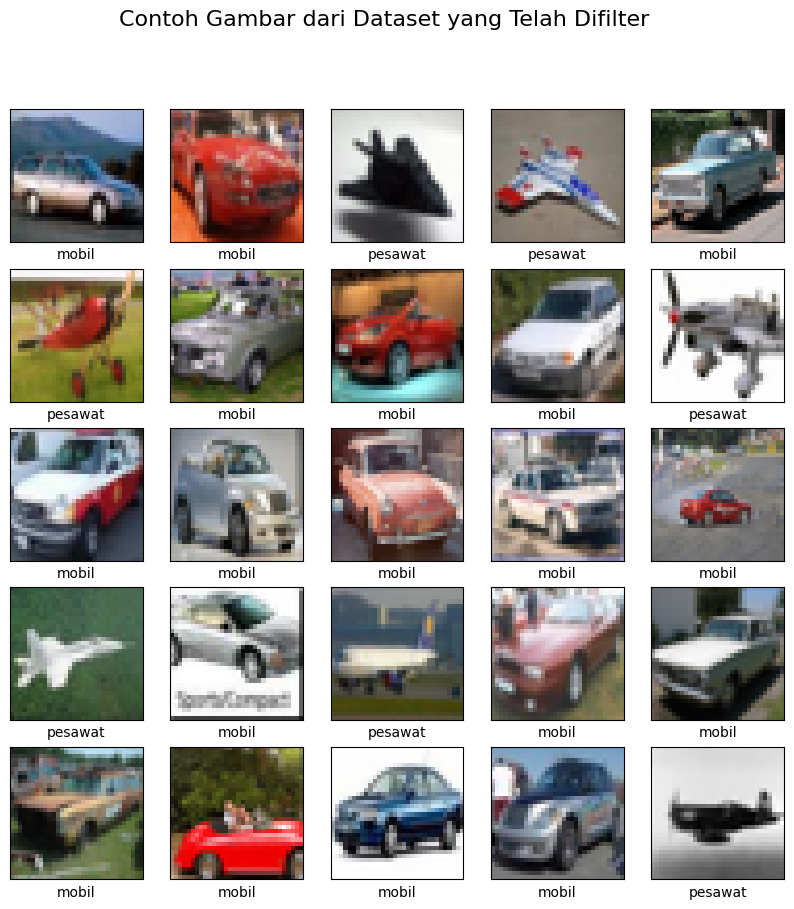

In [ ]:
# ## Langkah 4: Persiapan dan Normalisasi Data
# Nilai piksel gambar dinormalisasi dari rentang [0, 255] ke [0, 1] agar
# proses pelatihan lebih stabil dan cepat.
# %%
# Normalisasi data gambar
train_images, test_images = train_images / 255.0, test_images / 255.0

# Verifikasi beberapa gambar setelah persiapan
new_class_names = ['pesawat', 'mobil']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(new_class_names[train_labels[i][0]])
plt.suptitle("Contoh Gambar dari Dataset yang Telah Difilter", fontsize=16)
plt.show()

# %% [markdown]


In [6]:
# ## Langkah 5: Membangun Arsitektur Model CNN
#
# Model CNN sederhana ini terdiri dari lapisan konvolusi untuk ekstraksi fitur
# dan lapisan Dense untuk klasifikasi akhir.

# %%
model = models.Sequential([
    # Lapisan Konvolusi pertama
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Lapisan Konvolusi kedua
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Lapisan Konvolusi ketiga
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Meratakan output untuk lapisan Dense
    layers.Flatten(),

    # Lapisan Dense (fully-connected)
    layers.Dense(64, activation='relu'),
    # Lapisan output dengan 1 neuron dan aktivasi sigmoid untuk klasifikasi biner
    layers.Dense(1, activation='sigmoid')
])

# Tampilkan ringkasan arsitektur model
model.summary()


# %% [markdown]


c:\Users\noriz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,985 (476.50 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# ## Langkah 6: Kompilasi dan Pelatihan Model
#
# Model dikompilasi dengan optimizer `adam` dan loss `binary_crossentropy`
# yang cocok untuk masalah klasifikasi dua kelas.

# %%
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
print("\nMemulai proses pelatihan model...")
history = model.fit(train_images, train_labels,
                    epochs=15,  # Jumlah epoch bisa disesuaikan
                    validation_data=(test_images, test_labels),
                    verbose=1)
print("Pelatihan model selesai.")




Memulai proses pelatihan model...
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7314 - loss: 0.5051 - val_accuracy: 0.8510 - val_loss: 0.3438
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8906 - loss: 0.2664 - val_accuracy: 0.8905 - val_loss: 0.2435
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9172 - loss: 0.2018 - val_accuracy: 0.9300 - val_loss: 0.1755
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9357 - loss: 0.1564 - val_accuracy: 0.9330 - val_loss: 0.1608
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9493 - loss: 0.1291 - val_accuracy: 0.9495 - val_loss: 0.1305
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9585 - loss: 0.1078 - val_accuracy: 0.9455 - val_loss: 0.1504
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9657 - loss: 0.0876 - val_accuracy: 0.9460 - val_loss: 0.1340
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.972

In [8]:

# %% [markdown]
# ## Langkah 7: Evaluasi Model
#
# Performa model dievaluasi pada data uji (data yang belum pernah dilihat sebelumnya)
# untuk mengukur seberapa baik model dapat menggeneralisasi.

# %%
print("\nMengevaluasi model pada data uji...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n==============================================")
print(f"Akurasi Model pada Data Uji: {test_acc*100:.2f}%")
print(f"==============================================")




Mengevaluasi model pada data uji...
63/63 - 0s - 3ms/step - accuracy: 0.9525 - loss: 0.1817

Akurasi Model pada Data Uji: 95.25%


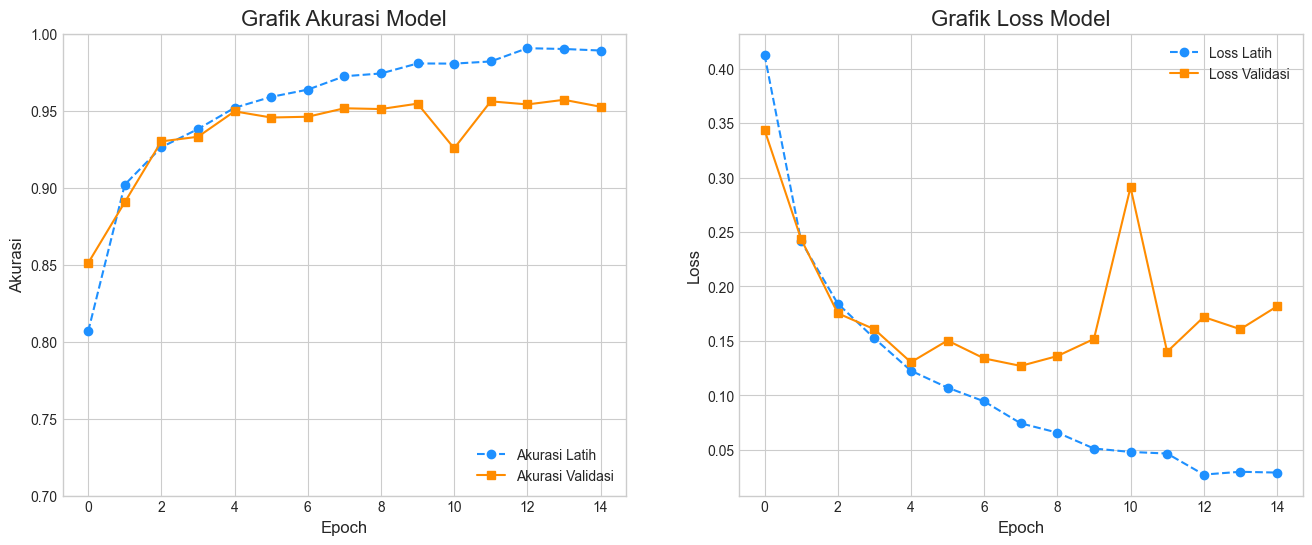

In [9]:

# %% [markdown]
# ## Langkah 8: Visualisasi Hasil Pelatihan
#
# Grafik di bawah ini menunjukkan perubahan akurasi dan loss selama pelatihan,
# baik pada data latih maupun data validasi.

# %%
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Akurasi
ax1.plot(history.history['accuracy'], label='Akurasi Latih', color='dodgerblue', marker='o', linestyle='--')
ax1.plot(history.history['val_accuracy'], label='Akurasi Validasi', color='darkorange', marker='s')
ax1.set_title('Grafik Akurasi Model', fontsize=16)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Akurasi', fontsize=12)
ax1.legend(loc='lower right')
ax1.set_ylim([0.7, 1])

# Plot Loss
ax2.plot(history.history['loss'], label='Loss Latih', color='dodgerblue', marker='o', linestyle='--')
ax2.plot(history.history['val_loss'], label='Loss Validasi', color='darkorange', marker='s')
ax2.set_title('Grafik Loss Model', fontsize=16)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(loc='upper right')

plt.show() 